In [ ]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Google Colaboratoryで作業する場合はこちらも実行してください。
from google.colab import drive
drive.mount('/content/drive')
# %cd 以降にこのnotebookを置いているディレクトリを指定してください。
%cd "/content/drive/MyDrive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
# データの読み込み
# INPUT_DIRにClient.csvなどのデータを置いているディレクトリを指定してください。
INPUT_DIR = "/content/drive/MyDrive"

Client = pd.read_csv(INPUT_DIR + "/Client.csv")
Record = pd.read_csv(INPUT_DIR + "/Record.csv")


In [ ]:
# trainデータの確認
print(f"train shape: {Client.shape}")
Client.head(3)

train shape: (100000, 50)


,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003


In [ ]:
# Recordデータの確認
print(f"test shape: {Record.shape}")
Record.head(3)

test shape: (100000, 50)


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58


In [ ]:
df = pd.concat([Client, Record], axis=1)
df.head(3)

,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,...,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months
0,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,...,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61
1,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,...,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56
2,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,...,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58


In [ ]:
df=df.drop('Customer_ID', axis=1)
df.head(3)

,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,...,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months
0,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,...,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61
1,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,...,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56
2,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,...,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58


In [ ]:
df=df.drop('lor',axis=1)

#相関係数が1の特徴量に片方を削除
df=df.drop('adjqty',axis=1)
df=df.drop('adjmou',axis=1)
df=df.drop('adjrev',axis=1)
df=df.drop('vceovr_Mean',axis=1)
df=df.drop('plcd_vce_Mean',axis=1)
df=df.drop('comp_vce_Mean',axis=1)

df.head(3)

In [ ]:
#欠損値を中央値で補完
df = df.fillna(df.mean())
df.describe()

,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,...,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.548140,1.358960,2877.141930,7648.363833,1031.924988,960.111528,7546.314699,2836.366920,57.913832,483.726493,...,0.416283,165.280703,1.135804,10.044298,145.752225,109.666977,0.011700,1.782928,0.495620,18.833990
std,1.075255,0.655555,3790.863474,8666.558293,852.907511,840.170815,8594.889729,3756.513882,36.161292,438.485213,...,4.652627,237.332918,17.768683,15.418406,159.348094,119.594305,0.547470,5.353953,0.499983,9.655794
min,1.000000,0.000000,0.000000,0.000000,3.650000,2.400000,0.000000,0.000000,0.480000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1.000000,1.000000,889.000000,2529.000000,518.980000,452.180000,2474.000000,868.000000,35.370000,176.140000,...,0.000000,18.536667,0.000000,1.666667,38.333333,28.666667,0.000000,0.000000,0.000000,11.000000
50%,1.000000,1.000000,1822.000000,5191.500000,804.530000,737.760000,5102.500000,1789.000000,49.890000,360.190000,...,0.000000,75.841667,0.000000,5.333333,101.000000,76.000000,0.000000,0.333333,0.000000,16.000000
75%,2.000000,2.000000,3492.000000,9776.000000,1263.767500,1188.175000,9661.000000,3442.000000,69.480000,655.670000,...,0.000000,211.195000,0.000000,12.333333,199.666667,150.666667,0.000000,1.333333,1.000000,24.000000
max,196.000000,53.000000,98874.000000,233419.096700,27321.500000,27071.300000,232855.100000,98705.000000,924.270000,7040.130000,...,309.666667,4337.893333,2922.043333,489.666667,2289.000000,1894.333333,81.333333,212.666667,1.000000,61.000000


In [ ]:
df.replace(',', '')

,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,...,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months
0,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,...,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61
1,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,...,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56
2,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,...,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58
3,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,...,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60
4,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,...,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,1,U,B,N,3771,9534.00000,1594.83,1561.14,9494.00,...,0.0,73.316667,0.0,2.000000,54.666667,45.333333,0.0,0.000000,1,25
99996,1,1,U,CY,Y,3675,8887.00000,1517.10,1451.85,8805.00,...,0.0,0.383333,0.0,4.000000,69.333333,53.333333,0.0,0.000000,0,27
99997,1,1,U,DA,N,1271,9336.00000,1114.91,1055.93,9234.00,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0,31
99998,1,1,U,EA,N,10082,20784.00000,2669.20,2593.26,20488.00,...,0.0,253.893333,0.0,19.333333,551.000000,417.333333,0.0,0.000000,0,25


In [ ]:
df['change_mou'].describe()

count    100000.000000
mean        -13.933818
std         274.854774
min       -3875.000000
25%         -86.000000
50%          -7.000000
75%          61.750000
max       31219.250000
Name: change_mou, dtype: float64

In [ ]:
df['mou_Mean'].describe()

count    100000.000000
mean        513.559937
std         524.229868
min           0.000000
25%         151.500000
50%         357.500000
75%         701.250000
max       12206.750000
Name: mou_Mean, dtype: float64

In [ ]:
df['change_mou'].describe()

count    100000.000000
mean        -13.933818
std         274.854774
min       -3875.000000
25%         -86.000000
50%          -7.000000
75%          61.750000
max       31219.250000
Name: change_mou, dtype: float64

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

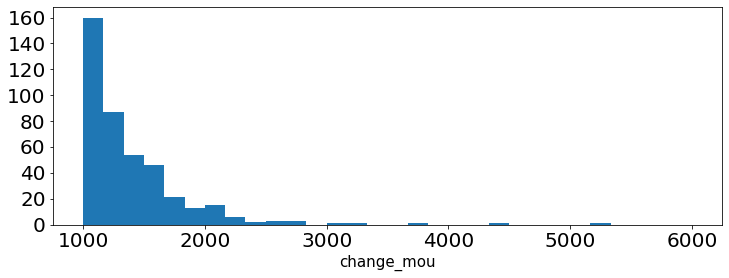

In [ ]:
# グラフの大きさ指定
plt.figure(figsize = (12, 4))

# x軸のラベルを指定
plt.xlabel('change_mou', fontsize=15)

# ヒストグラムの描写
plt.hist(x=df['change_mou'], bins=30, range=(1000,6000 ))

# Seabornで描写する場合
#sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

<AxesSubplot:>

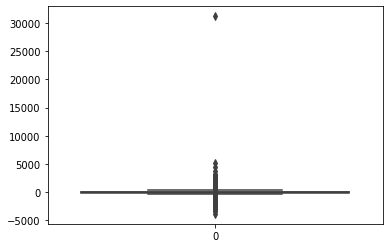

In [ ]:
sns.boxplot(data=df.change_mou)

In [ ]:
df['change_mou'].describe()

count    100000.000000
mean        -13.933818
std         274.854774
min       -3875.000000
25%         -86.000000
50%          -7.000000
75%          61.750000
max       31219.250000
Name: change_mou, dtype: float64

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

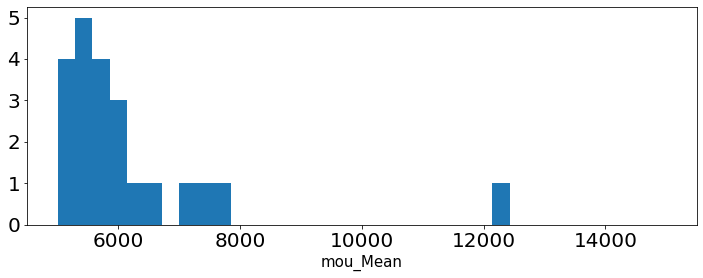

In [ ]:
# グラフの大きさ指定
plt.figure(figsize = (12, 4))

# x軸のラベルを指定
plt.xlabel('mou_Mean', fontsize=15)

# ヒストグラムの描写
plt.hist(x=df['mou_Mean'], bins=35, range=(5000,15000 ))

# Seabornで描写する場合
#sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

<AxesSubplot:>

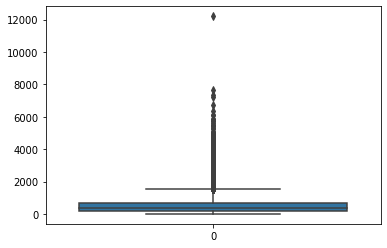

In [ ]:
sns.boxplot(data=df.mou_Mean)

In [ ]:
df['mou_Mean'].describe()

count    100000.000000
mean        513.559937
std         524.229868
min           0.000000
25%         151.500000
50%         357.500000
75%         701.250000
max       12206.750000
Name: mou_Mean, dtype: float64

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

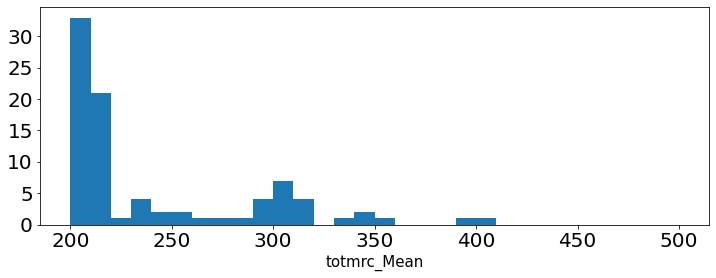

In [ ]:
# グラフの大きさ指定
plt.figure(figsize = (12, 4))

# x軸のラベルを指定
plt.xlabel('totmrc_Mean', fontsize=15)

# ヒストグラムの描写
plt.hist(x=df['totmrc_Mean'], bins=30, range=(200,500))

# Seabornで描写する場合
#sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

<AxesSubplot:>

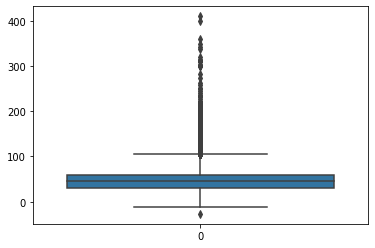

In [ ]:
sns.boxplot(data=df.totmrc_Mean)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

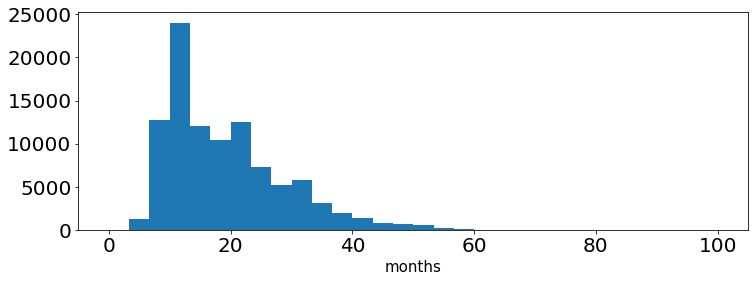

In [ ]:
# グラフの大きさ指定
plt.figure(figsize = (12, 4))

# x軸のラベルを指定
plt.xlabel('months', fontsize=15)

# ヒストグラムの描写
plt.hist(x=df['months'], bins=30, range=(0,100))

# Seabornで描写する場合
#sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

<AxesSubplot:>

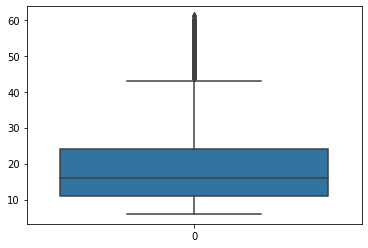

In [ ]:
sns.boxplot(data=df.months)

count    100000.000000
mean         -1.021067
std          50.138337
min       -1107.740000
25%          -7.203125
50%          -0.322500
75%           1.545000
max        9963.657500
Name: change_rev, dtype: float64

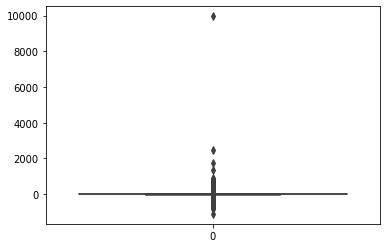

In [ ]:
sns.boxplot(data=df.change_rev)
df['change_rev'].describe()

<AxesSubplot:>

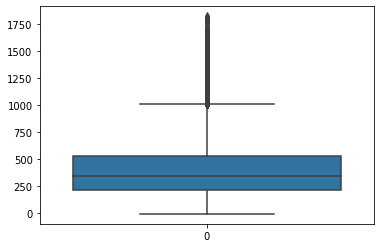

In [ ]:
sns.boxplot(data=df.eqpdays)

<AxesSubplot:>

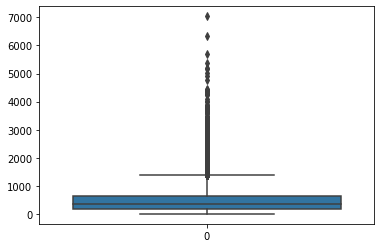

In [ ]:
sns.boxplot(data=df.avgmou)

<AxesSubplot:>

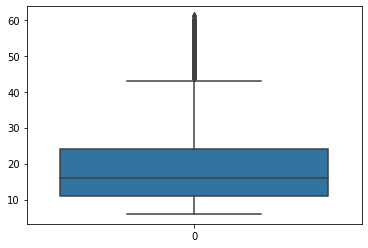

In [ ]:
sns.boxplot(data=df.months)

In [ ]:
#change_mouに対して95%以上の値と5%以下の値を外れ値として除く
q = df.change_mou.quantile(0.95)
df = df.query('change_mou < @q ')


q_min=df.change_mou.quantile(0.05)
df = df.query('change_mou > @q_min')
df['change_mou'].describe()

count    90246.000000
mean       -13.014553
std        128.676431
min       -398.000000
25%        -74.000000
50%         -7.250000
75%         49.500000
max        343.500000
Name: change_mou, dtype: float64

In [ ]:
#mou_Meanに対して95%以上の値を外れ値として除く
q = df.mou_Mean.quantile(0.95)
df = df.query('mou_Mean < @q ')
df['mou_Mean'].describe()

count    85731.000000
mean       373.098528
std        311.533376
min          0.000000
25%        125.750000
50%        293.000000
75%        542.250000
max       1340.500000
Name: mou_Mean, dtype: float64

In [ ]:
#totmrcに対して95%以上の値を外れ値として除く
q = df.totmrc_Mean.quantile(0.95)
df = df.query('totmrc_Mean < @q ')
df['totmrc_Mean'].describe()

count    81437.000000
mean        40.258932
std         16.312420
min        -26.915000
25%         29.990000
50%         39.990000
75%         49.990000
max         76.980000
Name: totmrc_Mean, dtype: float64

In [ ]:
#changerev5%以上の値を外れ値として除く
q = df.change_rev.quantile(0.95)
df = df.query('change_rev < @q ')
df['change_rev'].describe()

count    77365.000000
mean        -4.450963
std         15.535462
min       -224.977500
25%         -5.785000
50%         -0.435000
75%          0.247500
max         30.250000
Name: change_rev, dtype: float64

In [ ]:
# One-Hot Encodingの適用
x_ohe = pd.get_dummies(df)

# 適用結果の確認（最初の10件）
x_ohe[:10]

,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,...,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y,creditcd_N,creditcd_Y
0,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,...,1,0,1,0,1,0,1,0,0,1
2,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,...,0,1,1,0,1,0,1,0,0,1
3,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,...,1,0,1,0,1,0,1,0,0,1
4,1,1,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,...,1,0,1,0,1,0,1,0,0,1
5,2,2,26812,40869.00000,4033.98,3932.90,40295.00,26362,83.68,857.34,...,1,0,1,0,1,0,1,0,0,1
6,2,2,6279,17390.03333,3091.70,3065.24,17371.03,6271,58.95,334.06,...,1,0,1,0,1,0,1,0,0,1
7,1,1,4491,12492.00000,1427.71,1423.06,12439.00,4470,34.71,303.39,...,1,0,1,0,1,0,1,0,0,1
8,1,1,16730,43231.05333,4404.44,4313.71,42943.05,16579,81.39,810.25,...,1,0,1,0,1,0,1,0,1,0
9,2,2,391,994.00000,1458.42,1457.84,976.00,377,26.51,17.75,...,1,0,1,0,1,0,1,0,0,1
10,2,2,2392,6868.11000,3290.73,3195.01,6620.11,2312,56.05,116.14,...,1,0,1,0,1,0,1,0,0,1


In [ ]:
x_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77365 entries, 0 to 99999
Columns: 229 entries, uniqsubs to creditcd_Y
dtypes: float64(68), int64(9), uint8(152)
memory usage: 57.3 MB


In [ ]:
 from sklearn.model_selection import train_test_split
 # 目的変数にchurnを指定、説明変数にそれ以外を指定
X = x_ohe.drop('churn', axis=1)
y = x_ohe['churn']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# 重要度の上位20項目を取得
feature_importances = pd.DataFrame(clf.feature_importances_, index=x_ohe2.drop(["churn"], axis=1).columns, columns=["importance"])
top_20_features = feature_importances.sort_values("importance", ascending=False).head(20)

# 上位20項目のカラムを抽出
top_20_columns = top_20_features.index.values
data_top_20 = df[top_20_columns]
data_top_20.head()

import optuna.integration.lightgbm as lgb
dtrain = lgb.Dataset(X_train, label=y_train)
eval_data = lgb.Dataset(X_test, label=y_test)

param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
    }

best = lgb.train(param, 
                 dtrain,
                 valid_sets=eval_data,
                 early_stopping_rounds=100)

best_params = best.params
print(best_params)

In [ ]:
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
!pip install catboost scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import catboost as cb
from catboost import CatBoost,CatBoostClassifier
#Catoost
params = {
 
    'loss_function': 'Logloss'
    }

catb = cb.CatBoostClassifier(**params).fit(X_train,y_train)

y_pred_cb=catb.predict(X_test)

Learning rate set to 0.059974
0:	learn: 0.6903544	total: 53.7ms	remaining: 53.7s
1:	learn: 0.6876249	total: 99.7ms	remaining: 49.8s
2:	learn: 0.6849625	total: 154ms	remaining: 51.3s
3:	learn: 0.6823949	total: 202ms	remaining: 50.2s
4:	learn: 0.6801282	total: 250ms	remaining: 49.8s
5:	learn: 0.6778373	total: 298ms	remaining: 49.4s
6:	learn: 0.6755234	total: 346ms	remaining: 49.1s
7:	learn: 0.6736714	total: 411ms	remaining: 50.9s
8:	learn: 0.6723547	total: 463ms	remaining: 51s
9:	learn: 0.6707029	total: 546ms	remaining: 54.1s
10:	learn: 0.6695148	total: 673ms	remaining: 1m
11:	learn: 0.6680014	total: 789ms	remaining: 1m 4s
12:	learn: 0.6668158	total: 888ms	remaining: 1m 7s
13:	learn: 0.6655557	total: 957ms	remaining: 1m 7s
14:	learn: 0.6645029	total: 1.13s	remaining: 1m 13s
15:	learn: 0.6635562	total: 1.21s	remaining: 1m 14s
16:	learn: 0.6627195	total: 1.25s	remaining: 1m 12s
17:	learn: 0.6618851	total: 1.29s	remaining: 1m 10s
18:	learn: 0.6612290	total: 1.34s	remaining: 1m 9s
19:	learn:

In [ ]:
#スコアの算出
from sklearn.metrics import accuracy_score
accuracy4=accuracy_score(y_pred_cb, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_cb)))

LightGBM Model accuracy score: 0.6440


In [ ]:
# インポート
from sklearn.metrics import confusion_matrix

# テストデータを使って予測値を算出
y_pred = catb.predict(X_test)

m = confusion_matrix(y_test, y_pred)
print('Confution matrix:\n{}'.format(m))

Confution matrix:
[[4884 2826]
 [2683 5080]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('適合率:{:.3f}'.format(precision_score(y_test, y_pred_cb)))
print('再現率:{:.3f}'.format(recall_score(y_test, y_pred_cb)))
print('F1値:{:.3f}'.format(f1_score(y_test, y_pred_cb)))

適合率:0.643
再現率:0.654
F1値:0.648


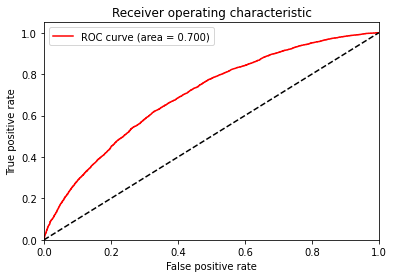

In [ ]:
# インポート
from sklearn import svm
from sklearn.metrics import roc_curve, auc
# 予測確率を取得
y_pred_cb = catb.predict_proba(X_test)[:,1]
# 偽陽性率と真陽性率の算出
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cb)

# AUCの算出
auc = auc(fpr, tpr)

# ROC曲線の描画
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %.3f)' % auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")

import optuna
if __name__ == '__main__':
    study = optuna.create_study()
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

ロジスティック回帰分析

# ハイパーパラメータのすべての組み合わせでモデルを構築・検証
scores = {}
for gamma in np.logspace(-3, 2, num=6):
    for C in np.logspace(-3, 2, num=6):
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train,y_train)
        scores[(gamma, C)] = svm.score(X_test, y_test)

# 検証結果をscoresに格納 
scores = pd.Series(scores)

# 表示
print('ベストスコア:{:.2f}'.format(scores.max()))
print('その時のパラメータ(gamma, C):{}'.format(scores.idxmax()))

# ヒートマップを表示。縦軸にgamma、横軸にCを表示
sns.heatmap(scores.unstack())

# インポート
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# GridSearchCVクラスに与えるパラメータを準備
param_grid = { 'C': np.logspace(-3, 2, num=6)
               ,'gamma':np.logspace(-3, 2, num=6)}

# GridSearchCVクラスの初期化
gs = GridSearchCV(estimator=SVC(),
                  param_grid=param_grid,
                  cv=5)

# ハイパーパラメータの組み合わせの検証とベストモデルの構築
gs.fit(X_train,y_train)

# 表示
print('Best cross validation score:{:.3f}'.format(gs.best_score_))
print('Best parameters:{}'.format(gs.best_params_))
print('Test score:{:.3f}'.format(gs.score(X_test,y_test)))

ニューラルネットワーク分析

def outlier_iqr(df):

    for i in range(len(df.columns)):

        # 列を抽出する
        col = df.iloc[:,i]

        # 四分位数
        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 #四分位範囲

        # 外れ値の基準点
        outlier_min = q1 - (iqr) * 1.5
        outlier_max = q3 + (iqr) * 1.5

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return df

In [ ]:
#shap.summary_plot(shap_values, X_train)

In [ ]:
#explainer = shap.TreeExplainer(model=clf,data=X_train)
#shap_values = explainer.shap_values(X_train)


# calculate positive rate
change_mou_positive_rate = y_train[y_train == 1].groupby(X_train['change_mou']).count() / X_train['change_mou'].value_counts()


# plot
plt.plot(change_mou_positive_rate, '-o')

plt.xlabel('change_mou (in years)')
plt.ylabel('Positive Rate')
plt.title('Positive Rate by change_mou')
plt.legend()
plt.show()


定額による違い．定額が低く，使用時間の変化率が減少，利益の増大（datovr_Mean）が起こっている場合，定額は高くなるが，使い放題の料金パッケージを提案することで．定額を大きくし，使用時間を増やし（使用時間の変化率を増やし）利益の減少をさせることで，解約率を下げる．また，利益減少による損失分を何か月で解約率の低下によって回収できるかを算出する．市場分析によって変化率が減少する人の特徴を調べる

In [ ]:
# 真値と予測値の表示
y_pred_cb=catb.predict(X_test)
df_pred = pd.DataFrame( {'churn_GT':y_test, 'churn_pred':y_pred_cb} )
display( df_pred )

,churn_GT,churn_pred
60890,1,1
15502,0,0
88599,0,0
6231,1,0
44785,1,1
...,...,...
47434,1,1
18513,1,0
9008,0,0
63838,0,0


In [ ]:
len(x_ohe)


77365

In [ ]:
df_pred['churn_pred'].value_counts()

1    7906
0    7567
Name: churn_pred, dtype: int64

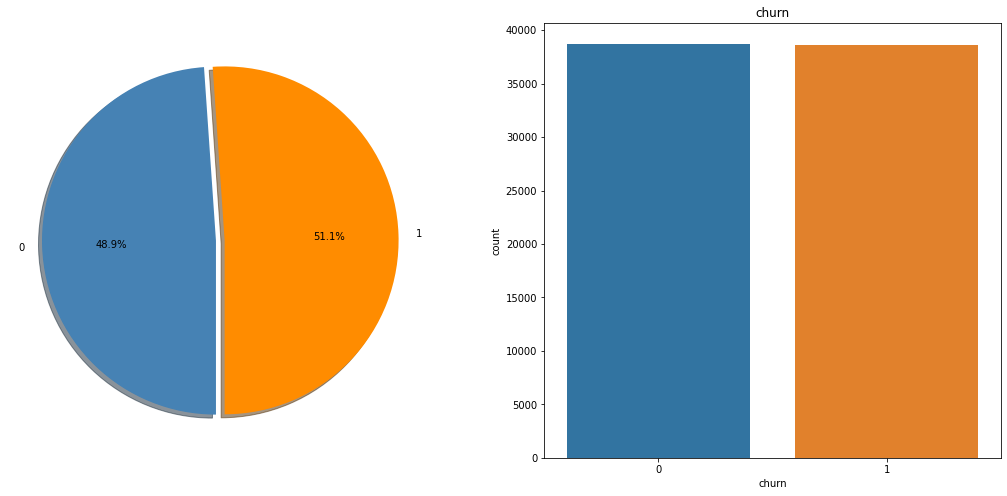

In [ ]:
#予測されたデータの解約者の割合
f,ax=plt.subplots(1,2,figsize=(18,8))
colors=['darkorange','steelblue']
df_pred['churn_pred'].value_counts().plot.pie(explode=[0,0.05],ax=ax[0],shadow=True,startangle=270,colors=colors,autopct="%1.1f%%")
ax[0].set_title('',fontsize=35)
ax[0].set_ylabel('')
sns.countplot('churn',data=df,ax=ax[1])
ax[1].set_title('churn')
plt.show()

In [ ]:
#1 51.1 0 48.9%

In [ ]:
target_idx = df_pred[df_pred['churn_pred'] == 1].index
len( target_idx )

target_idx

Int64Index([60890, 44785, 90232, 57972, 42805, 24710, 57298,  4630, 35213,
            21597,
            ...
            61348, 48526, 15165, 30331, 91617,  2641, 76956,  8041, 47434,
            52485],
           dtype='int64', length=7906)

In [ ]:
df.loc[target_idx]

,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,...,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months
60890,1,1,U,AA,N,1978,4864.0,743.03,663.05,4768.0,...,0.0,131.810000,0.0,1.666667,67.666667,48.333333,0.0,1.333333,1,12
44785,1,1,U,BA,N,2202,4892.0,890.37,830.39,4876.0,...,0.0,31.360000,0.0,1.666667,35.333333,30.000000,0.0,0.666667,1,21
90232,2,2,U,A2,N,1103,2655.0,238.07,180.50,2599.0,...,0.0,99.586667,0.0,30.000000,209.333333,156.666667,0.0,0.000000,1,7
57972,2,2,U,AA,N,718,2082.0,239.72,199.73,2082.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1,11
42805,1,1,U,AA,N,820,2347.0,654.53,620.36,2336.0,...,0.0,3.010000,0.0,0.666667,29.666667,9.666667,0.0,0.000000,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,1,1,Y,A,N,1611,3503.0,1043.47,1025.41,3503.0,...,0.0,29.476667,0.0,1.333333,42.000000,26.000000,0.0,0.000000,0,42
76956,2,2,N,AA,N,979,7333.0,663.87,633.34,7333.0,...,0.0,79.780000,0.0,3.666667,90.666667,52.666667,0.0,0.333333,1,9
8041,1,1,N,A,N,3304,6987.0,1885.06,1844.50,6946.0,...,0.0,28.193333,0.0,3.333333,48.666667,43.000000,0.0,0.000000,1,32
47434,1,1,U,DA,N,3722,8838.0,1242.69,1137.70,8837.0,...,0.0,115.136667,0.0,6.666667,244.000000,173.333333,0.0,3.333333,1,14


In [ ]:
# 解約者と予測された人のdfを取得
df_target = x_ohe.loc[target_idx]
df_target[['eqpdays','churn']].head(20)


,eqpdays,churn
60890,378.0,1
44785,603.0,1
90232,214.0,1
57972,321.0,1
42805,628.0,0
24710,349.0,1
57298,134.0,0
4630,334.0,0
35213,601.0,1
21597,659.0,1


#change_mouに対して95%以上の値と5%以下の値を外れ値として除く
q = df2.change_mou.quantile(0.95)
df2 = df2.query('change_mou < @q ')


q_min=df2.change_mou.quantile(0.05)
df2 = df2.query('change_mou > @q_min')
df2['change_mou'].describe()

#mou_Meanに対して95%以上の値を外れ値として除く
q = df2.mou_Mean.quantile(0.95)
df2 = df2.query('mou_Mean < @q ')
df2['mou_Mean'].describe()

#totmrcに対して95%以上の値を外れ値として除く
q = df2.totmrc_Mean.quantile(0.95)
df2 = df2.query('totmrc_Mean < @q ')
df2['totmrc_Mean'].describe()

In [ ]:
#総利用月数
df_target['months'] = 5

#  端末の使用日数を「0」に設定
df_target['eqpdays'] = 0

#  月平均の使用時間の変化率を43に設定
df_target['change_mou'] = 43

#月の平均使用時間を523分に設定
df_target['mou_Mean'] = 300

#月の継続利用料金を50ドルに設定
df_target['mou_Mean'] = 50

#月間平均売上変化率を0.36に設定

df_target['change_rev'] = 250

#  端末価格を「非解約者の第三四分位数(149$)」に設定
df_target['hnd_price'] = 149

In [ ]:
df.loc[target_idx] = df_target
df['eqpdays']

0         361.0
2        1504.0
3        1812.0
4         434.0
5         458.0
          ...  
99995     773.0
99996       0.0
99997       0.0
99998      75.0
99999       5.0
Name: eqpdays, Length: 77365, dtype: float64

In [ ]:
df.loc[target_idx].change_rev

60890    250.0
44785    250.0
90232    250.0
57972    250.0
42805    250.0
         ...  
2641     250.0
76956    250.0
8041     250.0
47434    250.0
52485    250.0
Name: change_rev, Length: 7906, dtype: float64

In [ ]:
# One-Hot Encodingの適用
x_ohe2 = pd.get_dummies(df)
# 適用結果の確認（最初の10件）
x_ohe2.head(10)

,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,...,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y,creditcd_N,creditcd_Y
0,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,...,1,0,1,0,1,0,1,0,0,1
2,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,...,0,1,1,0,1,0,1,0,0,1
3,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,...,1,0,1,0,1,0,1,0,0,1
4,1,1,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,...,1,0,1,0,1,0,1,0,0,1
5,2,2,26812,40869.00000,4033.98,3932.90,40295.00,26362,83.68,857.34,...,1,0,1,0,1,0,1,0,0,1
6,2,2,6279,17390.03333,3091.70,3065.24,17371.03,6271,58.95,334.06,...,1,0,1,0,1,0,1,0,0,1
7,1,1,4491,12492.00000,1427.71,1423.06,12439.00,4470,34.71,303.39,...,1,0,1,0,1,0,1,0,0,1
8,1,1,16730,43231.05333,4404.44,4313.71,42943.05,16579,81.39,810.25,...,1,0,1,0,1,0,1,0,1,0
9,2,2,391,994.00000,1458.42,1457.84,976.00,377,26.51,17.75,...,1,0,1,0,1,0,1,0,0,1
10,2,2,2392,6868.11000,3290.73,3195.01,6620.11,2312,56.05,116.14,...,1,0,1,0,1,0,1,0,0,1


In [ ]:
x_ohe2.loc[target_idx].change_rev

60890    250.0
44785    250.0
90232    250.0
57972    250.0
42805    250.0
         ...  
2641     250.0
76956    250.0
8041     250.0
47434    250.0
52485    250.0
Name: change_rev, Length: 7906, dtype: float64

In [ ]:
 # 目的変数にchurnを指定、説明変数にそれ以外を指定
X = x_ohe2.drop('churn', axis=1)
y = x_ohe2['churn']

In [ ]:
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

print( 'df_train: {}'.format( len(df_train) ) )
print( 'df_test : {}'.format( len(df_test) ) )

df_train: 61892
df_test : 15473


In [ ]:
import catboost as cb
from catboost import CatBoost,CatBoostClassifier
#Catoost
params = {
 
    'loss_function': 'Logloss'
    }

catb = cb.CatBoostClassifier(**params).fit(X_train,y_train)
y_pred2=catb.predict(X_test)
y_pred_prob2 = catb.predict_proba( X_test ) # テストデータのクラス予測確率を返す

Learning rate set to 0.059974
0:	learn: 0.6903544	total: 48.5ms	remaining: 48.5s
1:	learn: 0.6876249	total: 116ms	remaining: 57.9s
2:	learn: 0.6849625	total: 181ms	remaining: 1m
3:	learn: 0.6823949	total: 227ms	remaining: 56.6s
4:	learn: 0.6801282	total: 278ms	remaining: 55.4s
5:	learn: 0.6778373	total: 327ms	remaining: 54.2s
6:	learn: 0.6755234	total: 392ms	remaining: 55.6s
7:	learn: 0.6736714	total: 448ms	remaining: 55.5s
8:	learn: 0.6723547	total: 498ms	remaining: 54.8s
9:	learn: 0.6707029	total: 549ms	remaining: 54.3s
10:	learn: 0.6695148	total: 600ms	remaining: 53.9s
11:	learn: 0.6680014	total: 648ms	remaining: 53.4s
12:	learn: 0.6668158	total: 693ms	remaining: 52.6s
13:	learn: 0.6655557	total: 740ms	remaining: 52.2s
14:	learn: 0.6645029	total: 788ms	remaining: 51.8s
15:	learn: 0.6635562	total: 862ms	remaining: 53s
16:	learn: 0.6627195	total: 905ms	remaining: 52.4s
17:	learn: 0.6618851	total: 947ms	remaining: 51.7s
18:	learn: 0.6612290	total: 1.02s	remaining: 52.6s
19:	learn: 0.66

In [ ]:
#スコアの算出
from sklearn.metrics import accuracy_score
accuracy5=accuracy_score(y_pred2, y_test)
print('catbbost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred2)))

catbbost Model accuracy score: 0.5175


In [ ]:
# インポート
from sklearn.metrics import confusion_matrix

# テストデータを使って予測値を算出


m = confusion_matrix(y_test, y_pred2)
print('Confution matrix:\n{}'.format(m))

Confution matrix:
[[7345  365]
 [7100  663]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('適合率:{:.3f}'.format(precision_score(y_test, y_pred2)))
print('再現率:{:.3f}'.format(recall_score(y_test, y_pred2)))
print('F1値:{:.3f}'.format(f1_score(y_test, y_pred2)))

適合率:0.645
再現率:0.085
F1値:0.151


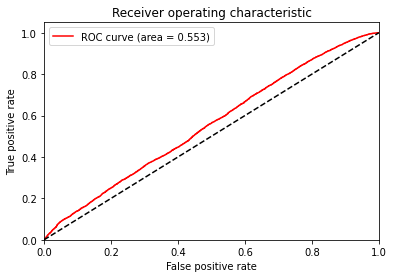

In [ ]:
# インポート
from sklearn import svm
from sklearn.metrics import roc_curve, auc
# 予測確率を取得
y_pred_cb2 = catb.predict_proba(X_test)[:,1]
# 偽陽性率と真陽性率の算出
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cb2)

# AUCの算出
auc = auc(fpr, tpr)

# ROC曲線の描画
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %.3f)' % auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")

In [ ]:


# 真値と予測値の表示
df_pred2 = pd.DataFrame( {'churn_GT':y_test, 'churn_pred':y_pred2} )
display( df_pred2 )

,churn_GT,churn_pred
60890,1,0
15502,0,0
88599,0,0
6231,1,0
44785,1,0
...,...,...
47434,1,0
18513,1,0
9008,0,0
63838,0,0


In [ ]:

df_pred2 = pd.DataFrame({'churn_pred':y_pred2})
df_pred2['churn_pred'].value_counts()

0    14445
1     1028
Name: churn_pred, dtype: int64

#予測されたデータの解約者の割合
f,ax=plt.subplots(1,2,figsize=(18,8))


df_pred2['churn_pred'].value_counts().plot.pie(ax=ax[0],shadow=True,startangle=270,fontsize=20)
ax[0].set_title('',fontsize=35)
ax[0].set_ylabel('')

Text(0, 0.5, '')

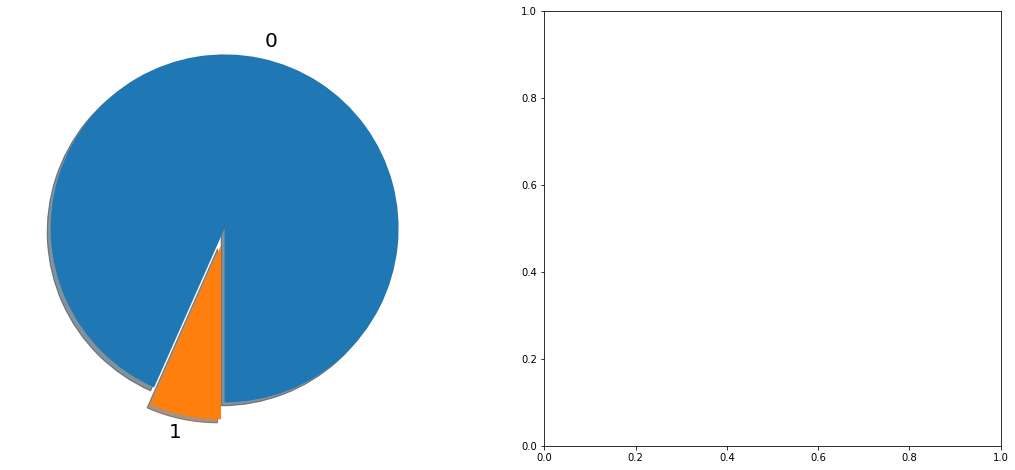

In [ ]:
#予測されたデータの解約者の割合
f,ax=plt.subplots(1,2,figsize=(18,8))


df_pred2['churn_pred'].value_counts().plot.pie(explode=[0,0.1],ax=ax[0],shadow=True,startangle=270,fontsize=20,)
ax[0].set_title('',fontsize=35)
ax[0].set_ylabel('')


In [ ]:
#1:6.6% , 0:93.4 % 